<a href="https://colab.research.google.com/github/juliaschubertpeixoto/TCC/blob/main/Subtraction_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.utils import shuffle
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models

#Data Processing

##Load Data

In [ ]:
path = '/content/drive/MyDrive/[TCC] Final Version/MSRC-12 Dataset/Subtraction Method/'
os.chdir(path)
X_train = np.load('train_data.npy' ).astype(np.float32)
y_train = np.load('train_tag.npy' ).astype(np.int32)
X_val = np.load('eval_data.npy' ).astype(np.float32)
y_val = np.load('eval_tag.npy' ).astype(np.int32)
print("Data imported successfuly!")

Data imported successfuly!


##Split Data

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.50, random_state=42)
print("Data splited successfuly!")
print(" ")
print("Number of samples on training set:", y_train.shape[0])
print("Number of samples on validation set:", y_val.shape[0])
print("Number of samples on test set:", y_test.shape[0])

Data splited successfuly!
 
Number of samples on training set: 4191
Number of samples on validation set: 1032
Number of samples on test set: 1032


##Normalize data

In [ ]:
new_train_data = tf.reshape(X_train, (-1,667*57)) 
n = MaxAbsScaler() 
n.fit(new_train_data)
newN = n.transform(new_train_data)
X_train = tf.reshape(newN, (-1,667,57))
print("Data normalized successfuly!")

Data normalized successfuly!


In [ ]:
new_train_data = tf.reshape(X_val, (-1,667*57)) 
n = MaxAbsScaler() 
n.fit(new_train_data)
newN = n.transform(new_train_data)
X_val = tf.reshape(newN, (-1,667,57))
print("Data normalized successfuly!")

Data normalized successfuly!


In [ ]:
new_train_data = tf.reshape(X_test, (-1,667*57)) 
n = MaxAbsScaler() 
n.fit(new_train_data)
newN = n.transform(new_train_data)
X_test = tf.reshape(newN, (-1,667,57))
print("Data normalized successfuly!")

Data normalized successfuly!


##Reshape Data

In [ ]:
train_data_conv = tf.reshape(X_train, (-1,667,57,1))
val_data_conv = tf.reshape(X_val, (-1,667,57,1))
test_data_conv = tf.reshape(X_test, (-1,667,57,1))
print("Data reshaped successfuly!")

Data reshaped successfuly!


#Convolutional Neural Network

##Training

*Proposed Model*

In [ ]:
model = models.Sequential()
model.add(layers.Input(shape=(667,57,1)))
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((3, 3), strides=3))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((3, 3), strides=3))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=7104, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(units=12, activation='softmax'))
model.summary()

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 667, 57, 16)       160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 222, 19, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 19, 32)       4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 6, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 6, 64)         18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 3, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 7104)              0

*Training*

In [ ]:
history = model.fit(train_data_conv, y_train,
          validation_data=(val_data_conv, y_val),
          batch_size=10,
          epochs=30, shuffle=True)

Epoch 1/30
420/420 [==============================] - 16s 20ms/step - loss: 2.1409 - accuracy: 0.2854 - val_loss: 1.4340 - val_accuracy: 0.5058
Epoch 2/30
420/420 [==============================] - 8s 18ms/step - loss: 1.2077 - accuracy: 0.5732 - val_loss: 0.9274 - val_accuracy: 0.6851
Epoch 3/30
420/420 [==============================] - 7s 18ms/step - loss: 0.9233 - accuracy: 0.6835 - val_loss: 0.7999 - val_accuracy: 0.7345
Epoch 4/30
420/420 [==============================] - 7s 18ms/step - loss: 0.6897 - accuracy: 0.7685 - val_loss: 0.7883 - val_accuracy: 0.7364
Epoch 5/30
420/420 [==============================] - 8s 18ms/step - loss: 0.5822 - accuracy: 0.7981 - val_loss: 0.7622 - val_accuracy: 0.7703
Epoch 6/30
420/420 [==============================] - 8s 18ms/step - loss: 0.5207 - accuracy: 0.8223 - val_loss: 0.5756 - val_accuracy: 0.8120
Epoch 7/30
420/420 [==============================] - 8s 18ms/step - loss: 0.4562 - accuracy: 0.8403 - val_loss: 0.6648 - val_accuracy: 0.807

###Analysis

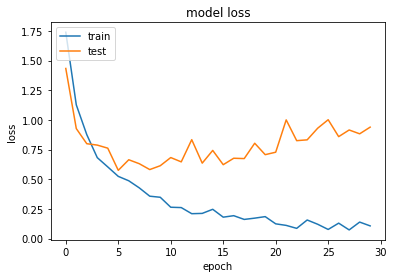

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

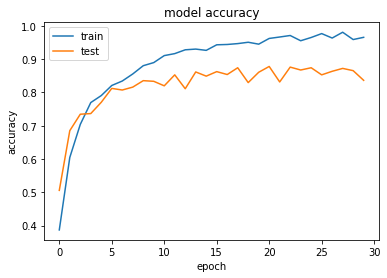

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

###Testing

In [ ]:
y_pred = model.predict(test_data_conv)
new_pred = np.zeros(y_pred.shape[0])
for i in range(y_pred.shape[0]):
  new_pred[i] = np.argmax(y_pred[i])
print("Testing Accuracy: ", sklearn.metrics.accuracy_score(y_true=y_test, y_pred=new_pred))

Testing Accuracy:  0.8488372093023255


#Recurrent Neural Network

##Training

*Model*

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.InputLayer(input_shape=(667,57)),   
tf.keras.layers.LSTM(128, return_sequences=True),
tf.keras.layers.LSTM(128, dropout=0.1),
tf.keras.layers.Dense(12, activation='softmax')
])

model.compile(optimizer = 'RMSProp',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 667, 128)          95232     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 12)                1548      
Total params: 228,364
Trainable params: 228,364
Non-trainable params: 0
_________________________________________________________________


*Training*

In [ ]:
history = model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          batch_size=10,
          epochs=30, shuffle=True)

Epoch 1/30
420/420 [==============================] - 25s 53ms/step - loss: 1.7660 - accuracy: 0.3668 - val_loss: 1.2201 - val_accuracy: 0.5504
Epoch 2/30
420/420 [==============================] - 21s 51ms/step - loss: 1.1145 - accuracy: 0.6237 - val_loss: 1.1295 - val_accuracy: 0.6424
Epoch 3/30
420/420 [==============================] - 21s 51ms/step - loss: 0.9117 - accuracy: 0.7024 - val_loss: 0.9731 - val_accuracy: 0.6705
Epoch 4/30
420/420 [==============================] - 21s 51ms/step - loss: 0.8386 - accuracy: 0.7240 - val_loss: 0.7880 - val_accuracy: 0.7607
Epoch 5/30
420/420 [==============================] - 21s 50ms/step - loss: 0.7146 - accuracy: 0.7690 - val_loss: 0.7166 - val_accuracy: 0.7752
Epoch 6/30
420/420 [==============================] - 22s 51ms/step - loss: 0.6409 - accuracy: 0.7906 - val_loss: 0.6830 - val_accuracy: 0.7829
Epoch 7/30
420/420 [==============================] - 21s 51ms/step - loss: 0.6227 - accuracy: 0.8021 - val_loss: 0.6383 - val_accuracy:

###Analysis

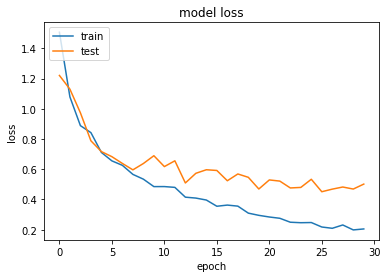

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

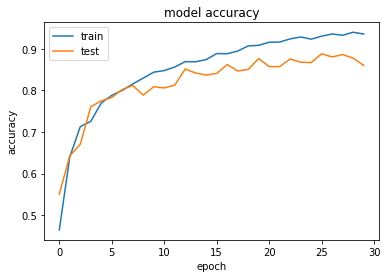

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

###Testing

In [ ]:
y_pred = model.predict(X_test)
new_pred = np.zeros(y_pred.shape[0])
for i in range(y_pred.shape[0]):
  new_pred[i] = np.argmax(y_pred[i])
print("Testing Accuracy: ", sklearn.metrics.accuracy_score(y_true=y_test, y_pred=new_pred))

Testing Accuracy:  0.8711240310077519
